<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
print(f"""
    {x_train.shape}
    {x_test.shape}
    {y_train.shape}
    {y_test.shape}
    """)


    (60000, 28, 28)
    (10000, 28, 28)
    (60000,)
    (10000,)
    


In [91]:
x_train[7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.24705882, 0.10980392, 0.        , 0.        ,
        0.        , 0.12941177, 0.33333334, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.10980392, 0.49411765,
        0.94509804, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.9882353 , 0.972549  , 0.43529412,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.80784315, 0.95686275, 0.9843137 ,
        0.94509804, 0.9019608 , 0.93333334, 0.8666667 , 0.8039216 ,
        0.9019608 , 0.9411

In [90]:
x_train[7].shape

(28, 28)

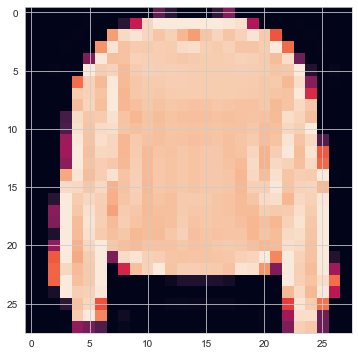

In [89]:
plt.imshow(x_train[7]);

In [9]:
y_train.shape

(60000,)

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
y_train.ndim

1

In [92]:
y_train[7]

2

In [13]:
pd.Series(y_train.flatten()).value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [14]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [96]:
y_train[35]

8

In [97]:
classes[y_train[35]]

'Bag'

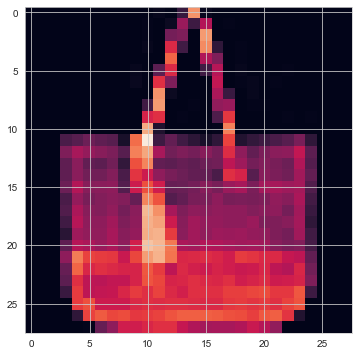

In [98]:
plt.imshow(x_train[35]);

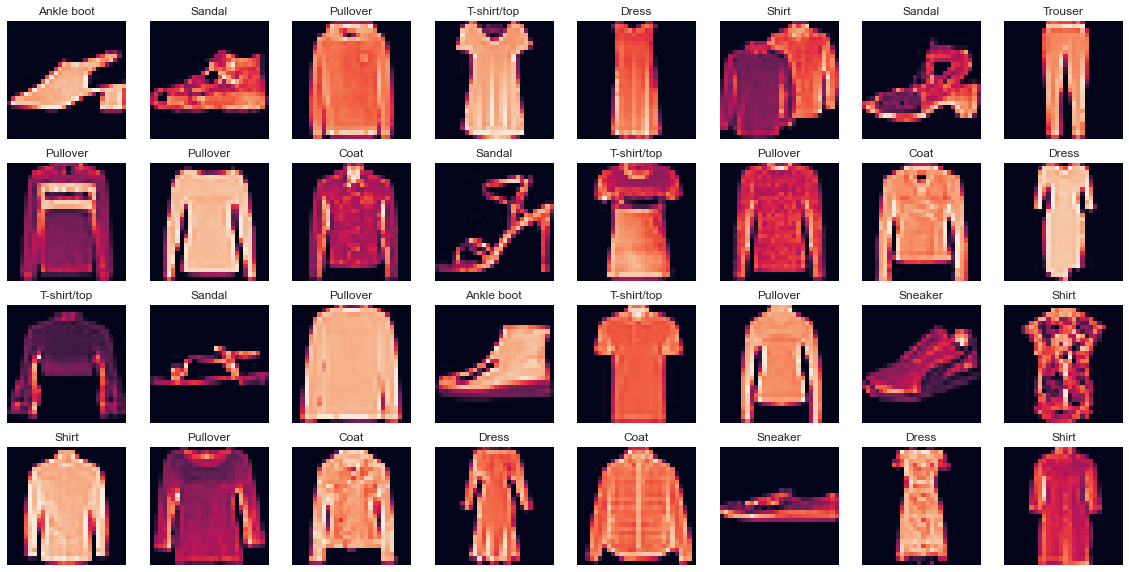

In [18]:
plt.figure(figsize=(20, 10))
for i in range(32):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(4, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [19]:
x_train.min()

0

In [20]:
x_train.max()

255

In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [22]:
x_train.min()

0.0

In [23]:
x_train.max()

1.0

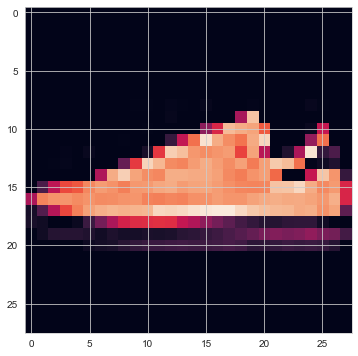

In [24]:
plt.imshow(x_train[6]);

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [25]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [26]:
x_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [27]:
X_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [28]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [31]:
y_train[6]

7

In [32]:
Y_train[6]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [33]:
y_test[10]

4

In [34]:
Y_test[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [36]:
from tensorflow.keras.layers import BatchNormalization

In [37]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=56, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 28)        112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 28)        0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 56)        14168     
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 56)        224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 56)        0

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [41]:
model.fit(X_train, Y_train, batch_size=48, epochs=20, validation_data=(X_test,Y_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 220s 4ms/sample - loss: 0.4653 - acc: 0.8395 - val_loss: 0.3664 - val_acc: 0.8824
Epoch 2/20
60000/60000 [==============================] - 245s 4ms/sample - loss: 0.3139 - acc: 0.8888 - val_loss: 0.3838 - val_acc: 0.8677
Epoch 3/20
60000/60000 [==============================] - 231s 4ms/sample - loss: 0.2832 - acc: 0.9012 - val_loss: 0.3323 - val_acc: 0.9017
Epoch 4/20
60000/60000 [==============================] - 261s 4ms/sample - loss: 0.2584 - acc: 0.9078 - val_loss: 0.2738 - val_acc: 0.9021
Epoch 5/20
60000/60000 [==============================] - 262s 4ms/sample - loss: 0.2359 - acc: 0.9149 - val_loss: 0.2456 - val_acc: 0.9106
Epoch 6/20
60000/60000 [==============================] - 282s 5ms/sample - loss: 0.2213 - acc: 0.9209 - val_loss: 0.2264 - val_acc: 0.9159
Epoch 7/20
60000/60000 [==============================] - 279s 5ms/sample - loss: 0.2106 - acc: 0.9248 - val_l

**TASK 7: Plot values of metrics you used in your model.**

In [42]:
model.metrics_names

['loss', 'acc']

In [43]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,acc,val_loss,val_acc
0,0.465,0.840,0.366,0.882
1,0.314,0.889,0.384,0.868
2,0.283,0.901,0.332,0.902
3,0.258,0.908,0.274,0.902
4,0.236,0.915,0.246,0.911
5,0.221,0.921,0.226,0.916
6,0.211,0.925,0.224,0.919


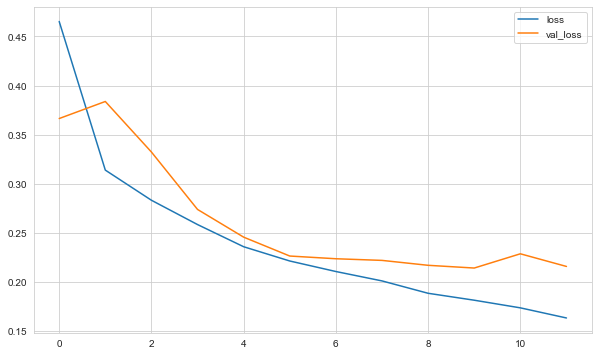

In [44]:
summary[["loss", "val_loss"]].plot();

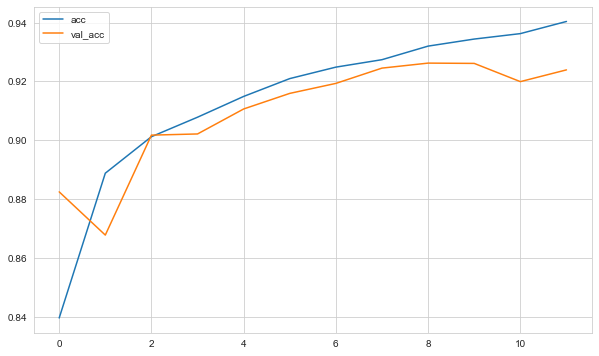

In [45]:
summary[["acc", "val_acc"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [46]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [47]:
model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 5s 506us/sample - loss: 0.2142 - acc: 0.9261


[0.21415676954984664, 0.9261]

In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21415676954984664
Test accuracy: 0.9261


In [49]:
pred_prob = model.predict(X_test)
pred_prob

array([[5.89730575e-08, 2.99569720e-08, 8.40449346e-08, ...,
        1.19714648e-04, 1.14162795e-08, 9.99850988e-01],
       [4.98675836e-05, 5.50245396e-08, 9.99834061e-01, ...,
        1.22120184e-06, 1.94165381e-07, 1.21163779e-07],
       [2.67774993e-07, 9.99997973e-01, 2.17775948e-07, ...,
        3.66503983e-08, 2.73836093e-07, 2.49532945e-08],
       ...,
       [4.10721850e-06, 6.41369638e-07, 8.56496445e-06, ...,
        4.28774774e-06, 9.99956965e-01, 5.03806086e-06],
       [2.25037820e-06, 9.99985099e-01, 1.43421789e-06, ...,
        5.39402038e-07, 7.70245265e-07, 9.16009697e-07],
       [2.77495037e-05, 5.04631425e-05, 2.21694427e-04, ...,
        2.91016251e-01, 1.24484606e-04, 1.19338324e-02]], dtype=float32)

In [50]:
pred_prob.shape

(10000, 10)

In [51]:
pred_prob[0]

array([5.89730575e-08, 2.99569720e-08, 8.40449346e-08, 1.04586832e-07,
       1.62229682e-07, 2.88141910e-05, 4.81352522e-08, 1.19714648e-04,
       1.14162795e-08, 9.99850988e-01], dtype=float32)

In [52]:
np.argmax(pred_prob[0])

9

In [53]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [54]:
y_pred.shape

(10000,)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.87      0.90      0.88      1000
           3       0.92      0.94      0.93      1000
           4       0.87      0.89      0.88      1000
           5       0.99      0.98      0.99      1000
           6       0.79      0.80      0.79      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [56]:
print(confusion_matrix(y_test, y_pred))

[[855   0  22  14   3   0  99   2   5   0]
 [  1 983   0  11   1   0   4   0   0   0]
 [ 12   1 895   7  35   0  50   0   0   0]
 [  7   1   9 935  28   0  20   0   0   0]
 [  1   1  58  16 891   0  33   0   0   0]
 [  0   0   0   0   0 983   0   9   0   8]
 [ 63   0  47  27  63   0 795   1   4   0]
 [  0   0   0   0   0   3   0 979   0  18]
 [  3   0   1   4   4   1   5   7 975   0]
 [  0   0   0   0   0   2   1  27   0 970]]


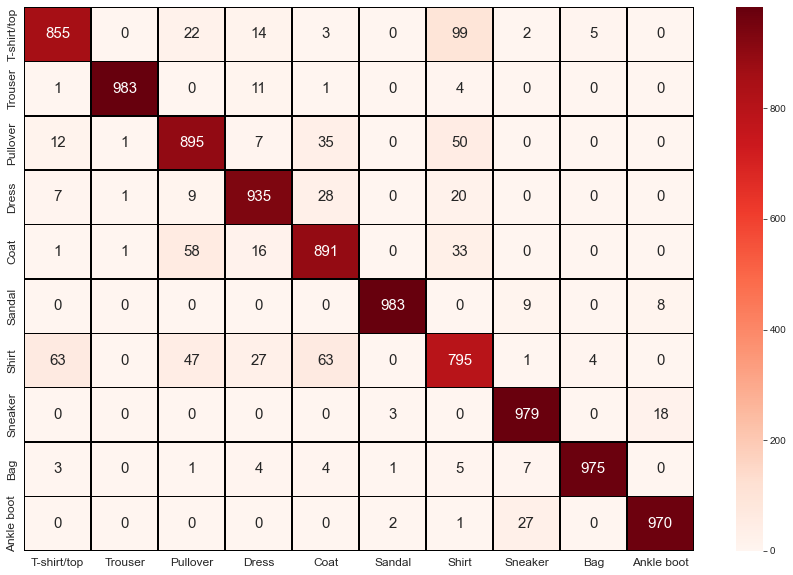

In [57]:
plt.figure(figsize=(15,10))
ax= sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Reds", linewidths=.6, linecolor='black', fmt='g', annot_kws = {"size": 15})
ax.set_xticklabels(classes, fontsize=12)
ax.set_yticklabels(classes, fontsize=12)
plt.show()

In [58]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [59]:
(y_test != y_pred).sum()

739

## Prediction

In [68]:
my_image = X_test[35]

In [69]:
my_image.shape

(28, 28, 1)

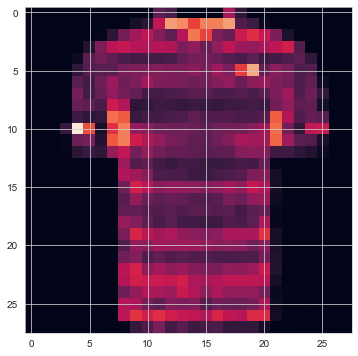

In [70]:
plt.imshow(my_image);

In [71]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [72]:
image_prediction

array([[9.9279779e-01, 2.3478315e-06, 2.4046576e-04, 2.2175784e-04,
        1.5998221e-05, 6.3083938e-08, 6.7111608e-03, 1.8958423e-06,
        6.4276101e-06, 1.9866663e-06]], dtype=float32)

In [73]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [75]:
result=np.argmax(image_prediction, axis=1)

In [76]:
result

array([0], dtype=int64)

In [83]:
classes[int(result)]

'T-shirt/top'

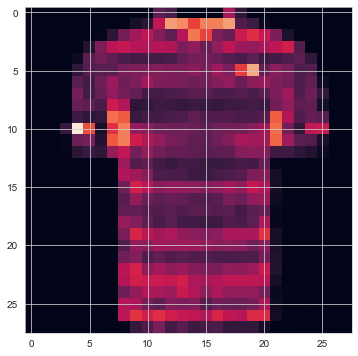

In [84]:
plt.imshow(my_image);